## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

**We want to find the 10 most meaningful words, and which ones are the character names**



In [4]:
import requests 
import nltk
from bs4 import BeautifulSoup
from collections import Counter # This will be used for storing values in dictionary values


In [5]:
# We will get the book from Project Gutenberg, which has around 60k books
# we will copy link address
r = requests.get('https://www.gutenberg.org/files/16/16-h/16-h.htm')
r.status_code 
r.url  # will give URL
r.encoding = "utf-8" #if you go to the peter pan webpage the encoding is 8
html = r.text

#Lets see the HTML document
print(html[:3000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Peter Pan, by James M. Barrie</title>

<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-

In [6]:
#beautiful soup converts HTML code into unique code
soup = BeautifulSoup(html)
text = soup.text
print(text[0:2000])
# We can see from the earlier line code, that soup converts into a readable format







The Project Gutenberg eBook of Peter Pan, by James M. Barrie


body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-break-before: always; margin-top: 4em;}

hr {width: 80%; margin-top: 2em; margin-bottom: 2em;}

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

p.poem {text-indent: 0%;
        margin-left: 10%;
        font-size: 90%;
        margin-top: 1em;
        margin-bottom: 1em; }

p.letter {text-indent: 0%;
          margin-left

Tokenization is the process of seperating words into small pieces like characters, subwords. And these individual characters are called tokens

In [7]:
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
# This will get you the words
## Try to understand what does the w+ part do
tokens = tokenizer.tokenize(text)
print(tokens[:10])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter', 'Pan', 'by', 'James', 'M']


We need to lowercase everything because Peter capitalized, and peter in small is same

In [8]:
words = [token.lower() for token in tokens]
print(words[:10]) # everything in small

['the', 'project', 'gutenberg', 'ebook', 'of', 'peter', 'pan', 'by', 'james', 'm']


In [9]:
# We want to remove the meaningless words like the, an, a, by and we call this stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop_words = nltk.corpus.stopwords.words("english")
print(stop_words[:50])
# This gives a list of stopwords (or commonly used words) in this dataset

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


In [11]:
# WE will remove the stopwords
words_clean = [word for word in words if word not in stop_words] # no idea what this means
print(words_clean[:10])
# Compare this to "words", you will see by, the is removed


['project', 'gutenberg', 'ebook', 'peter', 'pan', 'james', 'barrie', 'body', 'margin', 'left']


In [12]:
count = Counter(words_clean)
top_twenty = count.most_common(20) # This will get top 20 words
print(top_twenty) # We see peter is the most common word, 

[('peter', 409), ('wendy', 362), ('said', 358), ('would', 217), ('one', 212), ('hook', 174), ('could', 142), ('cried', 136), ('john', 133), ('time', 126), ('darling', 118), ('see', 111), ('michael', 110), ('little', 104), ('mother', 102), ('boys', 101), ('gutenberg', 99), ('children', 98), ('like', 94), ('know', 93)]


In [13]:
protagonists = ["peter", "wendy", "hook", "john"]

In [14]:
# Now remember we had the HTML content on the top when we got the words, we want to remove that

In [15]:
trimmed_text = text[316:]
print(trimmed_text[:988])
# This is the table of content text[2580:] will give chapter 1

#We may want to this ahead of time before we do the parsing of the words

0%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-break-before: always; margin-top: 4em;}

hr {width: 80%; margin-top: 2em; margin-bottom: 2em;}

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

p.poem {text-indent: 0%;
        margin-left: 10%;
        font-size: 90%;
        margin-top: 1em;
        margin-bottom: 1em; }

p.letter {text-indent: 0%;
          margin-left: 10%;
          margin-right: 10%;
          margin-top: 1em;
          margin-bottom: 1em; }

p.center  {text-align: center;
           text-indent: 0em;
           margin-top: 1em;
           margin-bottom: 1em; }

a:link {color:blue; text-decoration:non


Text(0.5, 1.0, "Peter Pan's Most common words")

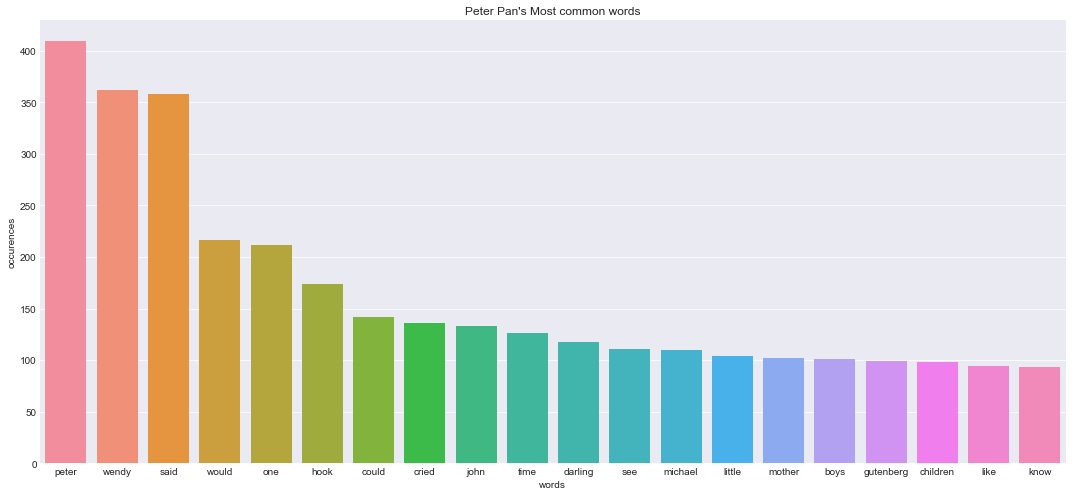

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(top_twenty, columns = ["words", "occurences"])
# we did this b/c remember the top twenty is like a dictionary with 2 items
sns.set_style("darkgrid")
plt.figure(figsize = (15,7))
sns.barplot(x = "words", y = "occurences", data = df, saturation = 0.9).set_title("Peter Pan's Most common words")
